<h1><center> PPOL 5203 Final Project <br><br> 
<font color='grey'>Data Visualization Wendy's version<br><br>
Wendy Shi</center></center> <h1>

Reference: https://python-graph-gallery.com/hexbin-map-from-geojson-python/

In [1]:
# Import geopandas library
import geopandas as gpd

# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)

In [2]:
geoData.dtypes

cartodb_id                   int64
created_at     datetime64[ns, UTC]
updated_at     datetime64[ns, UTC]
label                       object
bees                       float64
iso3166_2                   object
google_name                 object
geometry                  geometry
dtype: object

In [3]:
geoData.tail()

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry
46,295,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Minn.,51.2,MN,Minnesota (United States),"POLYGON ((-110.74597 49.57439, -108.02309 48.5..."
47,297,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Mont.,41.1,MT,Montana (United States),"POLYGON ((-121.63746 49.57439, -118.91459 48.5..."
48,296,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.D.,40.4,ND,North Dakota (United States),"POLYGON ((-116.19171 49.57439, -113.46884 48.5..."
49,331,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,A.K.,NaN,AK,Alaska (United States),"POLYGON ((-132.52895 55.31320, -129.80608 54.4..."
50,273,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Conn.,57.5,CT,Connecticut (United States),"POLYGON ((-75.34861 46.41987, -72.62574 45.325..."


/var/folders/xx/xxcg2dy55gx3nw8brrsbfwhr0000gn/T/ipykernel_1220/415889654.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geoData['centroid'] = geoData['geometry'].centroid


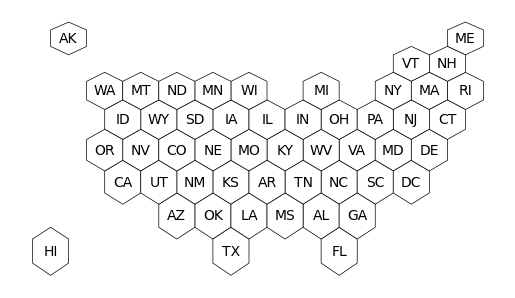

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

geoData['centroid'] = geoData['geometry'].centroid

# Redraw the empty hexbin map
geoData.plot(color="white", edgecolor='black', linewidth=0.5)
plt.axis('off')

# For each county, annotate with the county name located at the centroid coordinates
for idx, row in geoData.iterrows():
    centroid_x, centroid_y = row["centroid"].x, row["centroid"].y
    plt.text(centroid_x, centroid_y, s=row["iso3166_2"],
             horizontalalignment='center', va='center')

# Show the plot
plt.show()

##  Load data: US news ranking

In [5]:
import pandas as pd
csv_file_path = '/Users/wendyshi2001/Desktop/DataScience23/Final Project/CSV_data/Senti_clean.csv'
Senti = pd.read_csv(csv_file_path)
#USnews.rename(columns={'Ranking': 'USnews_rank'}, inplace=True)
Senti = Senti.iloc[:,1:4] #remove NA in last row
Senti

,State Abbr,N,mean_senti
0,AL,21,-0.685
1,AK,105,-0.398
2,AZ,26,-0.302
3,AR,0,0.000
4,CA,599,-0.316
5,CO,58,-0.030
6,CT,149,-0.252
7,DE,0,0.000
8,DC,0,0.000
9,FL,94,-0.434


In [6]:
geo_reset = geoData.reset_index()
geo_reset.tail()

,index,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid
46,46,295,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Minn.,51.2,MN,Minnesota (United States),"POLYGON ((-110.74597 49.57439, -108.02309 48.5...",POINT (-110.74597 47.46420)
47,47,297,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Mont.,41.1,MT,Montana (United States),"POLYGON ((-121.63746 49.57439, -118.91459 48.5...",POINT (-121.63746 47.46420)
48,48,296,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.D.,40.4,ND,North Dakota (United States),"POLYGON ((-116.19171 49.57439, -113.46884 48.5...",POINT (-116.19171 47.46420)
49,49,331,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,A.K.,NaN,AK,Alaska (United States),"POLYGON ((-132.52895 55.31320, -129.80608 54.4...",POINT (-132.52895 53.45575)
50,50,273,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Conn.,57.5,CT,Connecticut (United States),"POLYGON ((-75.34861 46.41987, -72.62574 45.325...",POINT (-75.34861 44.18058)


In [7]:
geo_reset["State_abbr"] = geo_reset["iso3166_2"].astype(str)
geo_reset.tail()

,index,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,State_abbr
46,46,295,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Minn.,51.2,MN,Minnesota (United States),"POLYGON ((-110.74597 49.57439, -108.02309 48.5...",POINT (-110.74597 47.46420),MN
47,47,297,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Mont.,41.1,MT,Montana (United States),"POLYGON ((-121.63746 49.57439, -118.91459 48.5...",POINT (-121.63746 47.46420),MT
48,48,296,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.D.,40.4,ND,North Dakota (United States),"POLYGON ((-116.19171 49.57439, -113.46884 48.5...",POINT (-116.19171 47.46420),ND
49,49,331,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,A.K.,NaN,AK,Alaska (United States),"POLYGON ((-132.52895 55.31320, -129.80608 54.4...",POINT (-132.52895 53.45575),AK
50,50,273,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Conn.,57.5,CT,Connecticut (United States),"POLYGON ((-75.34861 46.41987, -72.62574 45.325...",POINT (-75.34861 44.18058),CT


In [8]:
Senti_geo = geo_reset.set_index("State_abbr").join(Senti.set_index("State Abbr"))
Senti_geo = Senti_geo.reset_index()
Senti_geo.tail()

,State_abbr,index,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,N,mean_senti
46,MN,46,295,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Minn.,51.2,MN,Minnesota (United States),"POLYGON ((-110.74597 49.57439, -108.02309 48.5...",POINT (-110.74597 47.46420),0.0,0.000
47,MT,47,297,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Mont.,41.1,MT,Montana (United States),"POLYGON ((-121.63746 49.57439, -118.91459 48.5...",POINT (-121.63746 47.46420),39.0,-0.483
48,ND,48,296,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.D.,40.4,ND,North Dakota (United States),"POLYGON ((-116.19171 49.57439, -113.46884 48.5...",POINT (-116.19171 47.46420),26.0,-0.375
49,AK,49,331,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,A.K.,NaN,AK,Alaska (United States),"POLYGON ((-132.52895 55.31320, -129.80608 54.4...",POINT (-132.52895 53.45575),105.0,-0.398
50,CT,50,273,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Conn.,57.5,CT,Connecticut (United States),"POLYGON ((-75.34861 46.41987, -72.62574 45.325...",POINT (-75.34861 44.18058),149.0,-0.252


/var/folders/xx/xxcg2dy55gx3nw8brrsbfwhr0000gn/T/ipykernel_1220/507882846.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );


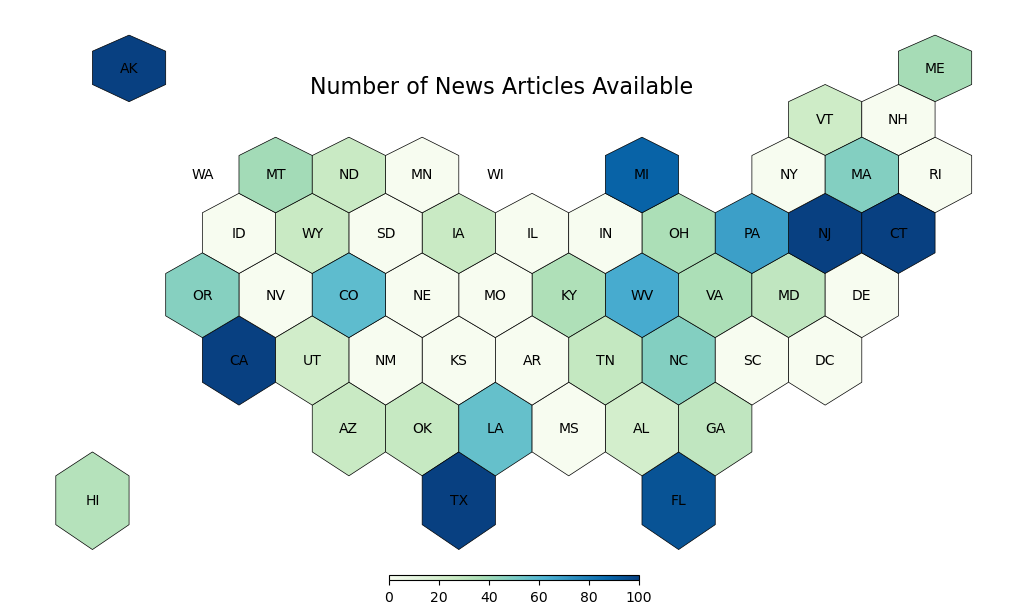

In [13]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))

# map counties with the right color:
Senti_geo.plot(
    ax=ax,
    column="N", 
    cmap="GnBu", 
    norm=plt.Normalize(vmin=0, vmax=100),
    edgecolor='black', 
    linewidth=.5
)

# Remove useless axis
ax.axis('off');

# Add title, subtitle and author
ax.annotate('Number of News Articles Available', 
            xy=(300,500),  xycoords='axes pixels', horizontalalignment='left', 
            verticalalignment='top', fontsize=16, color='black')

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    centroid_x, centroid_y = row["centroid"].x, row["centroid"].y
    plt.text(centroid_x, centroid_y, s=row["iso3166_2"],
             horizontalalignment='center', va='center')
    
# Add a color bar
sm = plt.cm.ScalarMappable(cmap="GnBu", norm=plt.Normalize(vmin=0, vmax=100))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );


In [33]:
fig.savefig("/Users/wendyshi2001/Desktop/DataScience23/Final Project/Number.png")

/var/folders/xx/xxcg2dy55gx3nw8brrsbfwhr0000gn/T/ipykernel_1220/205541705.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );


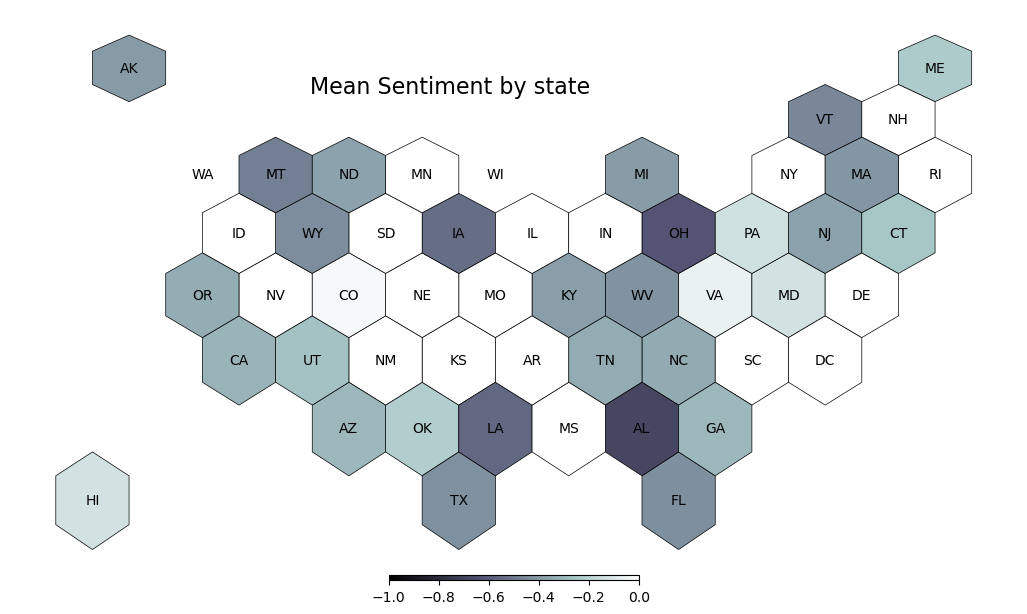

In [14]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))

# map counties with the right color:
Senti_geo.plot(
    ax=ax,
    column="mean_senti", 
    cmap="bone", 
    norm=plt.Normalize(vmin= -1, vmax=0),
    edgecolor='black', 
    linewidth=.5
)

# Remove useless axis
ax.axis('off');

# Add title, subtitle and author
ax.annotate('Mean Sentiment by state', 
            xy=(300,500),  xycoords='axes pixels', horizontalalignment='left', 
            verticalalignment='top', fontsize=16, color='black')

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    centroid_x, centroid_y = row["centroid"].x, row["centroid"].y
    plt.text(centroid_x, centroid_y, s=row["iso3166_2"],
             horizontalalignment='center', va='center')
    
# Add a color bar
sm = plt.cm.ScalarMappable(cmap="bone", norm=plt.Normalize(vmin= -1, vmax=0))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );

In [15]:
fig.savefig("/Users/wendyshi2001/Desktop/DataScience23/Final Project/Senti.png")